# Model Serving with the Python CLI 

The Konduit Python CLI provides a quick way to build model serving configuration. You can do this with YAML files. 

The YAMLs on this page can be used as boilerplate code for your model serving use cases. 


In [7]:
from PIL import Image 
import numpy as np 
from konduit.load import server_from_file, client_from_file

Download 
https://raw.githubusercontent.com/KonduitAI/konduit-serving/master/python/tests/resources/keras/embedding_lstm_tensorflow_2.h5

```yaml
serving:
  http_port: 1337
  input_data_format: NUMPY
  output_data_format: NUMPY
  log_timings: True
  extra_start_args: -Xmx8g
steps:
  python_step:
    type: PYTHON
    python_path: .
    python_code_path: ./simple.py
    python_inputs:
      first: NDARRAY
    python_outputs:
      second: NDARRAY
client:
    port: 1337
```


```bash
konduit serve --config ../yaml/konduit.yaml
konduit predict-numpy --config ../yaml/konduit.yaml --numpy_data ../data/bert/input-0.npy
konduit stop-server --config ../yaml/konduit.yaml
```

## python_step

Python steps can take any argument that can be passed to `PythonConfig`.  
Specify a Python step as follows: 

```yaml
steps: 
  python_step: 
    type: PYTHON
    python_code: simple.py 
```

- tensor_data_types_config
- model_config_type=
- python_code=None,
- python_code_path=None,
- python_inputs=None,
- python_outputs=None,
- extra_inputs=None,
- python_path=None,
- return_all_inputs=None,

Effectivelly, Python pipelines steps built for the CLI can only accept single inputs and outputs. The default name for inputs and outputs is `default`. This should be the key of your inputs to `python_step`. 

### Simple Python example

```yaml
serving:
  http_port: 1337
  input_data_format: NUMPY
  output_data_format: NUMPY
  log_timings: True
  extra_start_args: -Xmx8g
steps:
  python_step:
    type: PYTHON
    python_path: .
    python_code_path: ./simple.py
    python_inputs:
      first: NDARRAY
    python_outputs:
      second: NDARRAY
client:
    port: 1337
```

In [2]:
server_from_file("../yaml/bad_output.yaml")

Starting server...

Server has started successfully.


In [3]:
input_arr = np.array(33)

konduit_yaml_path = "../yaml/simple.yaml"
server = server_from_file(konduit_yaml_path)
client = client_from_file(konduit_yaml_path)
print(client.predict(input_arr))
server.stop()

np.save("../data/simple/input_arr.npy", input_arr)

Starting server....

Server has started successfully.
[35]


```bash
konduit serve --config ../yaml/simple.yaml
konduit predict-numpy --config ../yaml/simple.yaml --numpy_data ../data/simple/input_arr.npy
konduit stop-server --config ../yaml/simple.yaml
```

## PyTorch

```yaml
serving:
  http_port: 1337
  input_data_format: NUMPY
  output_data_format: NUMPY
  log_timings: True
  extra_start_args: -Xmx8g
steps:
  python_step:
    type: PYTHON
    python_path: .
    python_code_path: ../python/pytorch.py
    python_inputs:
      image: NDARRAY
    python_outputs:
      img_out_y: NDARRAY
client:
    port: 1337
```

In [4]:
im = Image.open("../data/facedetector/1.jpg")
im = np.array(im).astype("int")

konduit_yaml_path = "../yaml/pytorch.yaml"
server = server_from_file(konduit_yaml_path)
client = client_from_file(konduit_yaml_path)
print(client.predict(im))
server.stop()

Starting server...

Server has started successfully.
[[[0.9244309  0.07556909]
  [0.93430835 0.06569161]
  [0.93282    0.06717995]
  ...
  [0.950211   0.04978901]
  [0.95374817 0.04625188]
  [0.96080184 0.03919813]]]


In [5]:
np.save("../data/pytorch/im.npy", im)

```bash
konduit serve --config ../yaml/pytorch.yaml
konduit predict-numpy --config ../yaml/pytorch.yaml --numpy_data ../data/pytorch/im.npy
konduit stop-server --config ../yaml/pytorch.yaml
```

# ModelStep 
Unlike Python pipeline steps, ModelStep pipeline steps require a named input. 

## Deeplearning4j
```yaml
serving:
  http_port: 1337
  input_data_format: NUMPY
  output_data_format: NUMPY
  log_timings: True
  extra_start_args: -Xmx8g
steps:
  dl4j_mln_step:
    type: MULTI_LAYER_NETWORK
    model_loading_path: ../data/multilayernetwork/SimpleCNN.zip
    input_names: 
    - image_array
    output_names: 
    - output
    input_data_types:
      image_array: FLOAT
client:
    port: 1337
```

In [6]:
rand_image = np.random.randint(255, size=(3, 224, 224)) / 255
konduit_yaml_path = "../yaml/deeplearning4j.yaml"
server = server_from_file(konduit_yaml_path)
client = client_from_file(konduit_yaml_path)
print(client.predict({"image_array": rand_image}))
server.stop()

Starting server..

Server has started successfully.
[[4.0724486e-02 3.2171297e-01 2.4854962e-02 3.9229246e-05 6.1266840e-01]]


In [7]:
np.save("../data/multilayernetwork/image_array.npy", rand_image)

```bash
konduit serve --config ../yaml/deeplearning4j.yaml
konduit predict-numpy --config ../yaml/deeplearning4j.yaml --numpy_data ../data/multilayernetwork/image_array.npy
konduit stop-server --config ../yaml/deeplearning4j.yaml
```

## Tensorflow 1.x

```yaml 
serving:
  http_port: 1337
  input_data_format: NUMPY
  output_data_format: NUMPY
  log_timings: True
  extra_start_args: -Xmx8g
steps:
  tensorflow_step:
    type: TENSORFLOW
    model_loading_path: bert_mrpc_frozen.pb
    input_names:
      - IteratorGetNext:0
      - IteratorGetNext:1
      - IteratorGetNext:4
    output_names:
      - loss/Softmax
    input_data_types:
      IteratorGetNext:0: INT32
      IteratorGetNext:1: INT32
      IteratorGetNext:4: INT32
    parallel_inference_config:
      workers: 1
client:
    port: 1337
```

In [10]:
konduit_yaml_path = "../yaml/tensorflow-bert.yaml"
server = server_from_file(konduit_yaml_path)
client = client_from_file(konduit_yaml_path)

data_input = {
    'IteratorGetNext:0': np.load('../data/bert/input-0.npy'),
    'IteratorGetNext:1': np.load('../data/bert/input-1.npy'),
    'IteratorGetNext:4': np.load('../data/bert/input-4.npy')
}

print(client.predict(data_input))
server.stop()

Starting server..................

Server has started successfully.
[[9.9846917e-01 1.5308516e-03]
 [7.5513724e-04 9.9924493e-01]
 [9.9845624e-01 1.5437978e-03]
 [9.6907425e-01 3.0925732e-02]]


```yaml
serving:
  http_port: 1337
  input_data_format: NUMPY
  output_data_format: NUMPY
  log_timings: True
  extra_start_args: -Xmx8g
steps:
  tensorflow_step:
    type: TENSORFLOW
    model_loading_path: ../data/mnist/mnist_2.0.0.pb
    input_names:
      - input_layer
    output_names:
      - output_layer/Softmax
    input_data_types:
      input_layer: FLOAT
    parallel_inference_config:
      workers: 1
client:
    port: 1337
```

In [10]:
img = np.load("../data/mnist/input_layer.npy")
konduit_yaml_path = "../yaml/tensorflow-mnist.yaml"
server = server_from_file(konduit_yaml_path)
client = client_from_file(konduit_yaml_path)

Starting server..

Server has started successfully.


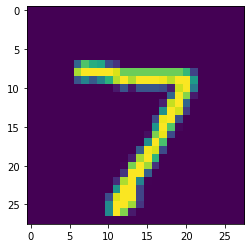

{0: 0.0, 1: 0.0, 2: 0.001, 3: 0.001, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.998, 8: 0.0, 9: 0.0}


In [11]:
plt.imshow(img)
predicted = client.predict(
    data_input={'input_layer': img}
)
plt.show()
print(dict(zip(np.arange(10), predicted[0].round(3))))
    
server.stop()

In [9]:
# TODO: figure out how to do this with --numpy-data 
# maybe just replace this with the mnist? 
# np.save("../data/mnist/input_layer.npy", img)

```bash
konduit serve --config ../yaml/tensorflow-mnist.yaml
konduit predict-numpy --config ../yaml/tensorflow-mnist.yaml --numpy_data ../data/mnist/input_layer.npy
konduit stop-server --config ../yaml/tensorflow-mnist.yaml
```

## Keras 

```yaml
serving:
  http_port: 1337
steps:
  keras_step:
    type: KERAS
    model_loading_path: ../data/keras/embedding_lstm_tensorflow_2.h5
    input_names:
    - input 
    output_names:
    - lstm_1
client:
    port: 1337
```

```bash
konduit serve --config ../yaml/keras.yaml
konduit predict-numpy --config ../yaml/keras.yaml --numpy_data ../data/keras/input.npy
konduit stop-server --config ../yaml/keras.yaml
```

In [12]:
input_array = np.random.uniform(size = [10])
np.save("../data/keras/input.npy", input_array)
konduit_yaml_path = "../yaml/keras.yaml"
server = server_from_file(konduit_yaml_path)
client = client_from_file(konduit_yaml_path)
print(client.predict({"input": input_array}))

server.stop()

Starting server....

Server has started successfully.
[[[0.49911702 0.4983615  0.49773094 0.49721536 0.496801   0.49647287
   0.49621654 0.49601877 0.495868   0.4957543 ]
  [0.49977526 0.49945772 0.49912393 0.4988142  0.49854672 0.49832645
   0.49815112 0.49801567 0.49791327 0.49783763]
  [0.5001145  0.5001818  0.500209   0.50020653 0.50018466 0.50015163
   0.50011355 0.5000747  0.5000376  0.5000038 ]
  [0.499907   0.49980363 0.4997118  0.499638   0.49958205 0.49954122
   0.4995122  0.49949202 0.49947822 0.4994689 ]
  [0.49957263 0.4993314  0.49921444 0.49917603 0.4991838  0.499216
   0.4992586  0.49930325 0.4993452  0.4993822 ]
  [0.50122684 0.5020251  0.5025376  0.50286067 0.50305897 0.50317615
   0.5032414  0.50327414 0.50328714 0.50328875]]]
